In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot
import platform
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

### 데이터 전처리
* 통계청에서 외부데이터를 사용하여 전국 연령별 인구비율을 확인하기 위해 데이터 전처리 진행

In [2]:
data=pd.read_csv('./Data/연령_및_성별_인구__읍면동_2015___시군구_2016__20210320160447.csv',encoding = "cp949",header=1)
idx_drop=data[data['연령별']=='85세이상'].index
data_set=data.drop(idx_drop).reset_index()
data_set=data_set.drop('index',axis=1)

In [3]:
sector=[]
pop=[]
for i in range(1,23,2):
    if i==1: 
        sector.append(data_set['연령별'][i][0:2]+data_set['연령별'][i+1][2:4])
        pop.append(int(data_set['총인구(명)'][i]+data_set['총인구(명)'][i+1]))
    elif i==21:
        sector.append(data_set['연령별'][i])
        pop.append(int(data_set['총인구(명)'][i]))
    else:
        sector.append(data_set['연령별'][i][0:2]+data_set['연령별'][i+1][2:6])
        pop.append(int(data_set['총인구(명)'][i]+data_set['총인구(명)'][i+1]))
total_pop=pd.DataFrame({'연령별':sector,'인구 수(명)':pop})
total_pop['인구비율(%)']=(total_pop['인구 수(명)']/data_set['총인구(명)'][0])*100
total_pop

,연령별,인구 수(명),인구비율(%)
0,0~9세,4158165,8.030570
1,10~19세,4871356,9.407939
2,20~29세,7026161,13.569465
3,30~39세,7304423,14.106866
4,40~49세,8304629,16.038542
5,50~59세,8608070,16.624570
6,60~69세,6181640,11.938461
7,70~79세,3521769,6.801513
8,80~89세,1586207,3.063406
9,90~99세,211909,0.409255


### 데이터 시각화
* 전처리한 데이터를 통해 인구비율을 확인, 비교하기 위해 파이차트로 시각화

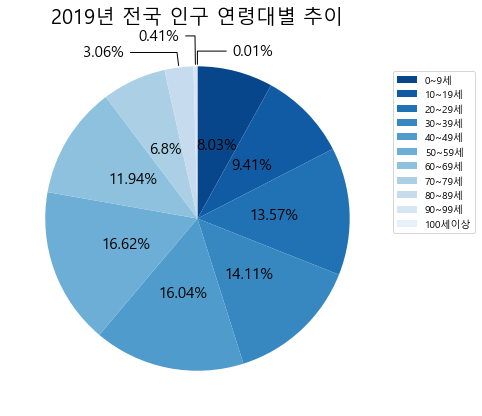

In [5]:
labels = total_pop['연령별'] ## 라벨
frequency = total_pop['인구 수(명)']#df1['세종특별자치시'].astype(int) #df1['pct'] ## 빈도
colors = sns.color_palette('Blues_r',len(total_pop['연령별']))
fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
ax = fig.add_subplot()
pie = ax.pie(frequency, 
             startangle=90, 
             counterclock=False, 
             colors=colors)
total = sum(frequency) ## 빈도수 합
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    if i < len(labels) - 1:
        sum_pct += (frequency.iloc[i]/total*100).round(2)
        text = f'{(frequency.iloc[i]/total*100).round(2)}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency.iloc[i]/total*100 < threshold and i < len(labels) - 3:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config,fontsize=15)
    elif frequency.iloc[i]/total*100 < threshold and i == len(labels) - 3:#마지막
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x-0.3, 1.2*y-0.1),
                    horizontalalignment=horizontalalignment, **config,fontsize=15)
    elif frequency.iloc[i]/total*100 < threshold and i == len(labels) - 2:#마지막
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x-0.1, 1.2*y),
                    horizontalalignment=horizontalalignment, **config,fontsize=15) 
    elif frequency.iloc[i]/total*100 < threshold and i == len(labels) - 1:#마지막
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x+0.5, 1.2*y-0.1),
                    horizontalalignment=horizontalalignment, **config,fontsize=15) 
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=15)
plt.legend(labels,bbox_to_anchor=(1, 0.9))
plt.title('2019년 전국 인구 연령대별 추이',fontsize=20)
plt.show()